### Imports

In [1]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import svm

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

### Load Data

In [2]:
x_train = np.loadtxt("./uci_har_dataset/train/X_train.txt")
y_train = np.loadtxt("./uci_har_dataset/train/y_train.txt")

x_test = np.loadtxt("./uci_har_dataset/test/X_test.txt")
y_test = np.loadtxt("./uci_har_dataset/test/y_test.txt")

### Combine Data

In [3]:
combined_x = np.concatenate((x_train, x_test))
combined_y = np.concatenate((y_train, y_test))

assert combined_x.shape[0] == x_train.shape[0] + x_test.shape[0]
assert combined_y.shape[0] == y_train.shape[0] + y_test.shape[0]

### KFold

In [4]:
def do_kfold_mutual_info(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do Mutual Information Feature Extraction
        features = x_data.shape[1] if(features == 'all') else features
        fs = SelectKBest(score_func=mutual_info_classif, k=features)
        fs.fit(x_data[train_idx], y_data[train_idx])
        x_train_fs = fs.transform(x_data[train_idx])
        x_test_fs = fs.transform(x_data[test_idx])
        
        # Fit and time model
        start = time.time()
        model.fit(x_train_fs, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate

        preds = model.predict(x_test_fs)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

### Training for Different Number of Mutual information

In [6]:
# Number of PCA Components
num_features = np.arange(5, 200, 20)

results = []
times = []
for features in num_features:
    print(features)
    pred_accuracy, fit_times = do_kfold_mutual_info(svm.SVC(kernel='poly', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

0it [00:00, ?it/s]

5


10it [21:26, 128.68s/it]
0it [00:00, ?it/s]

5 FEATURES PREDICTION ACCURACY: 0.717 $\pm$ 0.083
25


10it [20:33, 123.37s/it]
0it [00:00, ?it/s]

25 FEATURES PREDICTION ACCURACY: 0.846 $\pm$ 0.043
45


10it [20:40, 124.01s/it]
0it [00:00, ?it/s]

45 FEATURES PREDICTION ACCURACY: 0.890 $\pm$ 0.023
65


10it [19:25, 116.54s/it]
0it [00:00, ?it/s]

65 FEATURES PREDICTION ACCURACY: 0.903 $\pm$ 0.030
85


10it [13:09, 78.92s/it]
0it [00:00, ?it/s]

85 FEATURES PREDICTION ACCURACY: 0.909 $\pm$ 0.030
105


10it [08:36, 51.69s/it]
0it [00:00, ?it/s]

105 FEATURES PREDICTION ACCURACY: 0.915 $\pm$ 0.028
125


10it [08:33, 51.35s/it]
0it [00:00, ?it/s]

125 FEATURES PREDICTION ACCURACY: 0.925 $\pm$ 0.024
145


10it [09:25, 56.51s/it]
0it [00:00, ?it/s]

145 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.022
165


10it [08:39, 51.99s/it]
0it [00:00, ?it/s]

165 FEATURES PREDICTION ACCURACY: 0.934 $\pm$ 0.019
185


10it [08:34, 51.45s/it]

185 FEATURES PREDICTION ACCURACY: 0.938 $\pm$ 0.020


### Plot Results and Timing

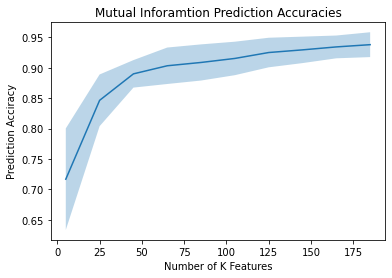

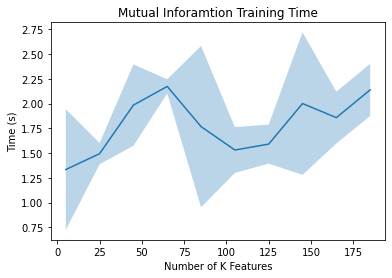

In [7]:
# Get means
acc_mean = np.mean(results, axis=1)
acc_stds = np.std(results, axis=1)
time_mean = np.mean(times, axis=1)
time_stds = np.std(times, axis=1)

# Plot prediction accuracies
fig, ax = plt.subplots()
ax.plot(num_features, acc_mean)
ax.fill_between(num_features, acc_mean+acc_stds, acc_mean-acc_stds, alpha=0.3)
ax.set(title="Mutual Inforamtion Prediction Accuracies", xlabel="Number of K Features", ylabel="Prediction Acciracy")
plt.show()

# Plot timing
fig, ax = plt.subplots()
ax.plot(num_features, time_mean)
ax.fill_between(num_features, time_mean+time_stds, time_mean-time_stds, alpha=0.3)
ax.set(title="Mutual Inforamtion Training Time", xlabel="Number of K Features", ylabel="Time (s)")
plt.show()